In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# Crear variable basada en rangos de precios
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Intermedia
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Intermedia
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Intermedia
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Económica
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Intermedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Intermedia
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Intermedia
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Intermedia
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Económica


In [15]:
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.4].index
df = df.drop(columns=cols_to_drop)

for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_3396\764786236.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_3396\764786236.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [16]:
y = df['PriceCategory']
X = df.drop(columns=['SalePrice', 'PriceCategory'])

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribución en y_train:\n", y_train.value_counts())
print("Distribución en y_test:\n", y_test.value_counts())

Distribución en y_train:
 PriceCategory
Intermedia    581
Económica     495
Cara           92
Name: count, dtype: int64
Distribución en y_test:
 PriceCategory
Intermedia    145
Económica     124
Cara           23
Name: count, dtype: int64


              precision    recall  f1-score   support

        Cara       0.76      0.83      0.79        23
   Económica       0.86      0.85      0.86       124
  Intermedia       0.85      0.84      0.84       145

    accuracy                           0.85       292
   macro avg       0.82      0.84      0.83       292
weighted avg       0.85      0.85      0.85       292



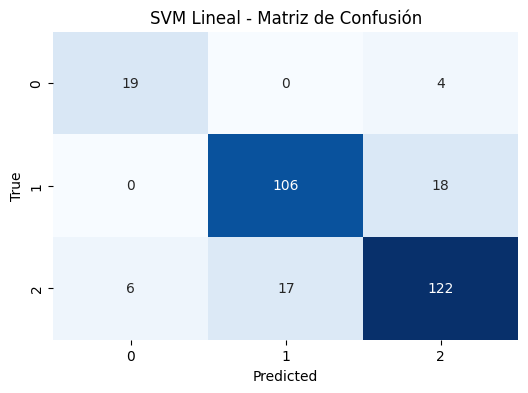

              precision    recall  f1-score   support

        Cara       0.92      0.48      0.63        23
   Económica       0.83      0.93      0.88       124
  Intermedia       0.86      0.84      0.85       145

    accuracy                           0.85       292
   macro avg       0.87      0.75      0.79       292
weighted avg       0.85      0.85      0.84       292



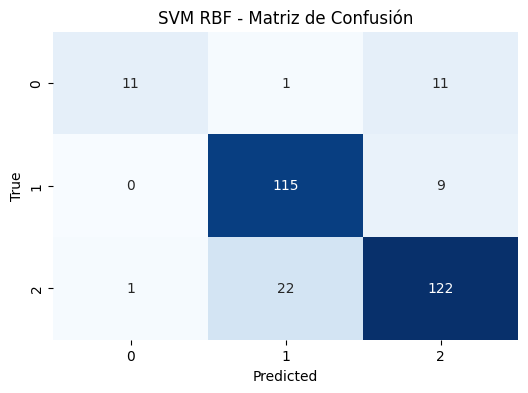

              precision    recall  f1-score   support

        Cara       0.86      0.26      0.40        23
   Económica       0.88      0.54      0.67       124
  Intermedia       0.65      0.93      0.76       145

    accuracy                           0.71       292
   macro avg       0.79      0.58      0.61       292
weighted avg       0.76      0.71      0.69       292



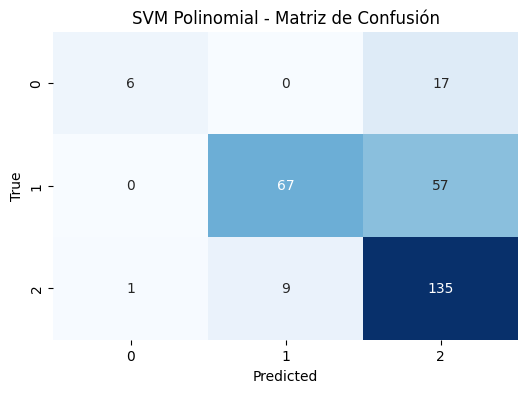

In [17]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Lineal
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_linear))
plot_confusion_matrix(y_test, y_pred_linear, "SVM Lineal - Matriz de Confusión")

# RBF
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))
plot_confusion_matrix(y_test, y_pred_rbf, "SVM RBF - Matriz de Confusión")

# Polinomial
svm_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print(classification_report(y_test, y_pred_poly))
plot_confusion_matrix(y_test, y_pred_poly, "SVM Polinomial - Matriz de Confusión")
